# Understanding the dataset

In [ ]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL.Image
import seaborn as sns

plt.style.use("tableau-colorblind10")
%matplotlib inline

In [ ]:
DATASET_PATH = "/home/vinayak/Face-Applications/datasets/celebrity_images/"

## Visualize the distribution of labels

In [ ]:
files = list(Path(DATASET_PATH).glob("**/*"))

records = []
for f in files:
    if f.is_file():
        w, h = PIL.Image.open(f).size
        records.append([f.name, f.parent.name, w, h])

df = pd.DataFrame(records, columns=["image", "label", "width", "height"])
df.sample(3)

,image,label,width,height
3127,4764.png,Jennifer Lopez,112,112
5734,8602.png,Simon Cowell,112,112
438,4178.png,James Spader,112,112


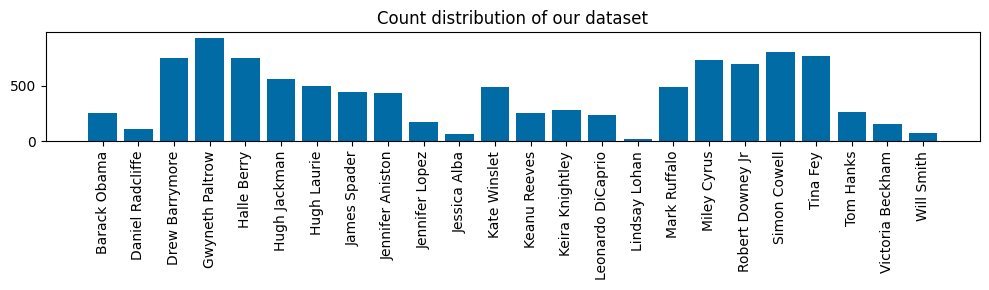

In [ ]:
count_df = df.groupby(by=["label"]).count().reset_index()

fig = plt.figure(figsize=(10, 3))
plt.bar(x=count_df.label.tolist(), height=count_df.image.tolist())
plt.xticks(rotation=90)
plt.title(f"Count distribution of our dataset")
plt.tight_layout()
plt.savefig(f"assets/label_distribution.png", orientation="landscape");

## Visualize the distribution of labels aggregated on the basis of gender

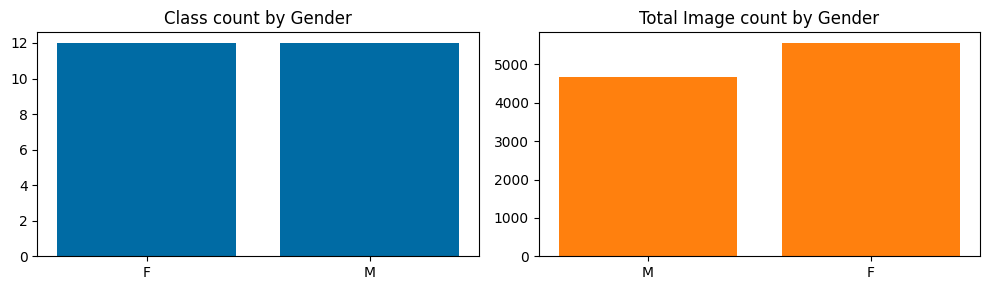

In [ ]:
gender_distribution = json.load(open("gender_distribution.json", "r"))
count_df["gender"] = count_df.label.apply(lambda x: gender_distribution[x])

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
plt.bar(x=count_df.gender.tolist(), height=count_df.image.tolist())

class_count = count_df.groupby(by=["gender"])["image"].count()
image_count = count_df.groupby(by=["gender"])["image"].sum()

ax[0].bar(x=class_count.index, height=class_count.values)
ax[1].bar(x=image_count.index, height=image_count.values)
ax[0].set_title("Class count by Gender")
ax[1].set_title("Total Image count by Gender")

fig.tight_layout()
fig.savefig(f"assets/genderwise_distribution.png", orientation="landscape");

## Collage of one image each from the entire dataset 

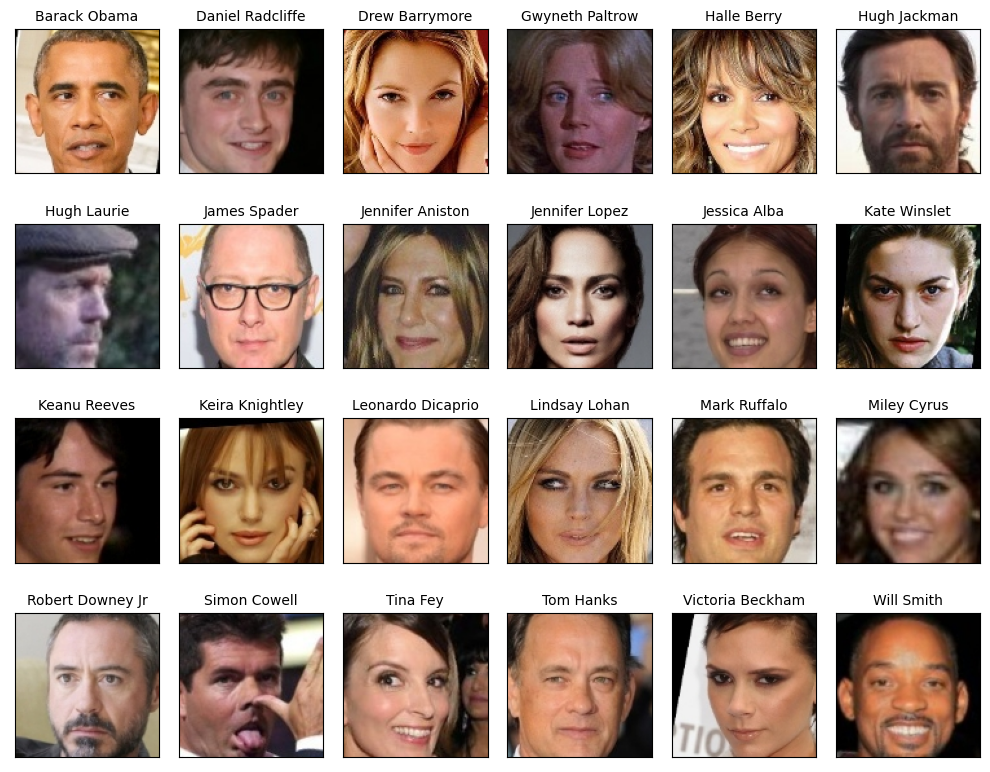

In [ ]:
fig, ax = plt.subplots(4, 6, figsize=(10, 8))
sampled_df = df.groupby(by=["label"]).sample(n=1, random_state=42)

for row, a in zip(sampled_df.itertuples(), ax.flat):
    _, name, lbl, *_ = row
    img_path = f"{DATASET_PATH}/{lbl}/{name}"
    a.imshow(PIL.Image.open(img_path))
    a.set_xticks([])
    a.set_yticks([])
    a.set_title(lbl.title(), fontsize=10)

fig.tight_layout()
fig.savefig(f"assets/dataset_collage.png", orientation="landscape");